## UVA MSDS Capstone Project Step 3 EDA
- This notebook uses Python to perform Exploratory Data Analysis on our datasets
- It primarily focuses and visualizes the Genus Communities comparing kidney disease vs control and diabetes vs control

In [37]:
## Importing some packages for the notebook
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
from matplotlib_venn import venn2, venn2_circles
from matplotlib import pyplot as plt

## Python Method to Compute Shannon Diversity Index

In [2]:
def shannon_index(df, variable ,var_val):
    """
    Inputs:
    df: pandas df object must contain diagnosis with index being the sample id
    variable: string to subset on
    var_val: string from the following variable column
    
    Outputs:
    Pandas dataframe containing shannon index
    """
    p_kd = df[df[variable] == var_val]
    p_kd = p_kd.drop(variable, axis = 1).set_index("index")
    
    H = []
    
    for i in range(p_kd.shape[0]):
        df2 = p_kd.iloc[i].to_frame()
        tot = df2.sum().values
        df2["p"] = list(df2.iloc[:,0].values)/tot
        df2 = df2.loc[~(df2 == 0).all(axis = 1)]
        df2["lnp"] = np.log(df2["p"])
        H.append(-sum(df2["p"]*df2["lnp"]))
        
    p_kd["shannon_index"] = H
    return p_kd

In [3]:
## Read in raw file
genus_counts = pd.read_csv('count_files/genus_counts.csv')

## Genera columns only for the function (ignoring the sample survey information for now)
cols_g = list(genus_counts.columns[0:810])
cols_g.append("diagnosis")
genus_cols = genus_counts[cols_g]

## Running the function above to create 3 dfs
kidney_genus_shannon = shannon_index(genus_cols,"diagnosis", "kidney_disease").reset_index()
control_genus_shannon = shannon_index(genus_cols, "diagnosis","control").reset_index()
diabetes_genus_shannon = shannon_index(genus_cols,"diagnosis", "diabetes").reset_index()

## Appending the shannon index to main df
kidney_genus_shannon = kidney_genus_shannon[["index","shannon_index"]]
control_genus_shannon = control_genus_shannon[["index","shannon_index"]]
diabetes_genus_shannon = diabetes_genus_shannon[["index","shannon_index"]]
genus_shannon = pd.concat([kidney_genus_shannon,control_genus_shannon,diabetes_genus_shannon], ignore_index= True)

## Main df with shannon index appended
genus_df = genus_counts.merge(genus_shannon, on = "index", how = "left").drop_duplicates()
genus_df.head()

C:\Users\Capstone1\AppData\Local\Temp\2\ipykernel_6136\3276847147.py:2: DtypeWarning: Columns (0,816) have mixed types. Specify dtype option on import or set low_memory=False.
  genus_counts = pd.read_csv('count_files/genus_counts.csv')
C:\Users\Capstone1\AppData\Local\Temp\2\ipykernel_6136\3245333470.py:19: RuntimeWarning: invalid value encountered in true_divide
  df2["p"] = list(df2.iloc[:,0].values)/tot
C:\Users\Capstone1\AppData\Local\Temp\2\ipykernel_6136\3245333470.py:19: RuntimeWarning: invalid value encountered in true_divide
  df2["p"] = list(df2.iloc[:,0].values)/tot
C:\Users\Capstone1\AppData\Local\Temp\2\ipykernel_6136\3245333470.py:19: RuntimeWarning: invalid value encountered in true_divide
  df2["p"] = list(df2.iloc[:,0].values)/tot
C:\Users\Capstone1\AppData\Local\Temp\2\ipykernel_6136\3245333470.py:19: RuntimeWarning: invalid value encountered in true_divide
  df2["p"] = list(df2.iloc[:,0].values)/tot
C:\Users\Capstone1\AppData\Local\Temp\2\ipykernel_6136\3245333470.p

,index,Staphylococcus,Corynebacterium_1,Pseudoalteromonas,Lawsonella,Corynebacterium,Psychrobacter,Lactobacillus,Unnamed: 8,Micrococcus,...,liver_disease,lung_disease,diet_type,whole_grain_frequency,meat_eggs_frequency,milk_cheese_frequency,prepared_meals_frequency,age_cat,diagnosis,shannon_index
0,10317.000041155,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,I do not have this condition,I do not have this condition,Omnivore,Regularly (3-5 times/week),Occasionally (1-2 times/week),Regularly (3-5 times/week),Daily,60s,control,0.598157
1,10317.000063283,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,I do not have this condition,I do not have this condition,Omnivore,Occasionally (1-2 times/week),Regularly (3-5 times/week),Daily,Rarely (less than once/week),20s,control,2.780425
2,10317.000063235,3.0,307.0,0.0,5.0,152.0,0.0,140.0,0.0,0.0,...,I do not have this condition,I do not have this condition,Vegan,Occasionally (1-2 times/week),Never,Never,Occasionally (1-2 times/week),20s,control,3.553720
3,10317.000047501,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,I do not have this condition,I do not have this condition,Omnivore,Regularly (3-5 times/week),Regularly (3-5 times/week),Regularly (3-5 times/week),Occasionally (1-2 times/week),60s,control,1.728330
4,10317.000039677,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,I do not have this condition,Omnivore,Rarely (less than once/week),Regularly (3-5 times/week),Regularly (3-5 times/week),Occasionally (1-2 times/week),60s,control,1.699313


## Kidney Violin Plots
- These plots display visual differences in shannon diversity indexes across different demographic variables for the control group vs. the group with diagnosed kidney disease


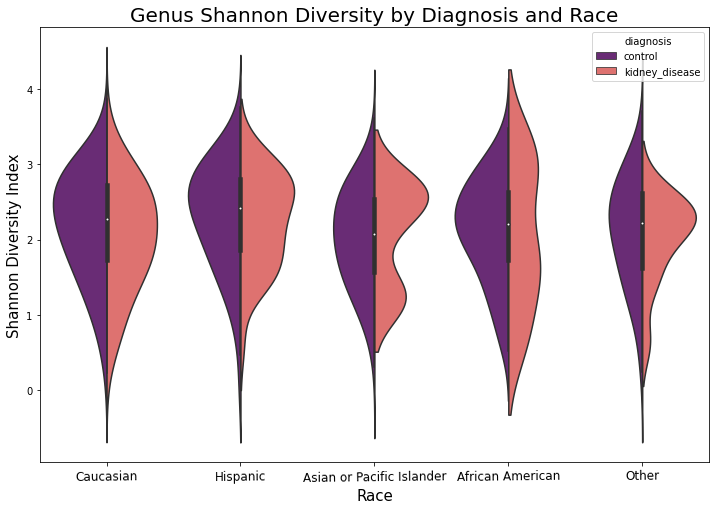

In [4]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Race", fontsize = 20)
sns.violinplot(data=genus_df[genus_df["diagnosis"] != "diabetes"], 
               x="race", y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma",
              order=["Caucasian", "Hispanic", "Asian or Pacific Islander", "African American", "Other"],
              split = True)
plt.xlabel("Race", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 12, rotation = .67)
plt.show()

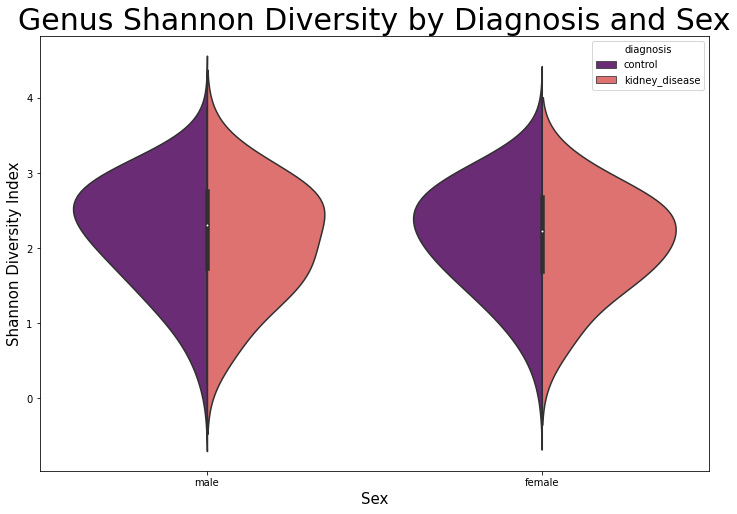

In [5]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Sex", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "diabetes") & (genus_df["sex"].isin(["male", "female"]))], 
               x="sex", y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Sex", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10)
plt.show()

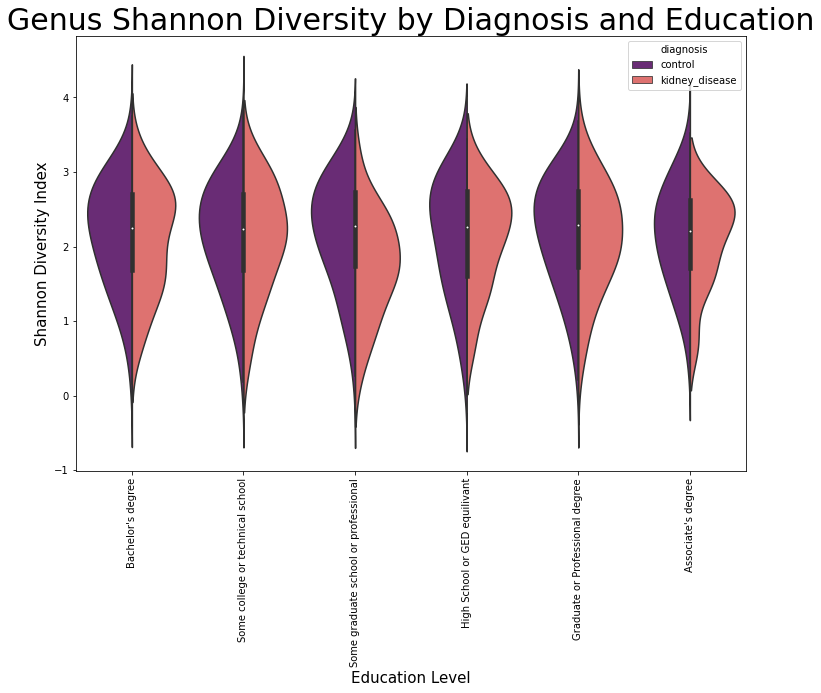

In [6]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Education", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "diabetes") & (~genus_df["level_of_education"].isin(["Did not complete high school", "Not provided"]))], 
               x="level_of_education", y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Education Level", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

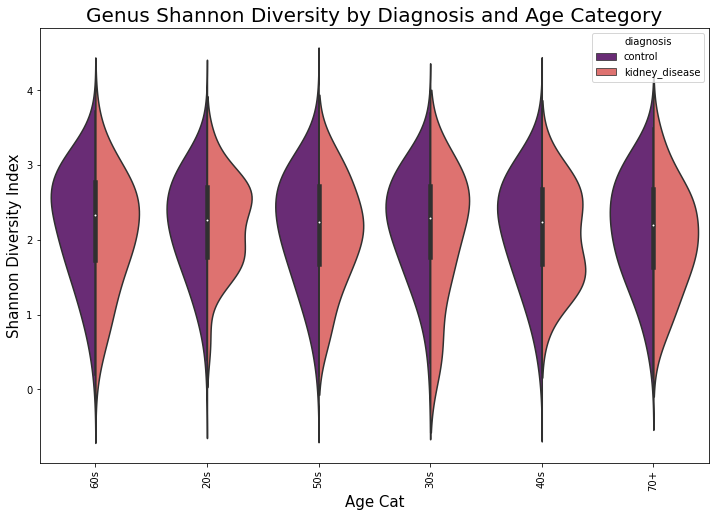

In [7]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Age Category", fontsize = 20)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "diabetes")], 
               x="age_cat", y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Age Cat", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

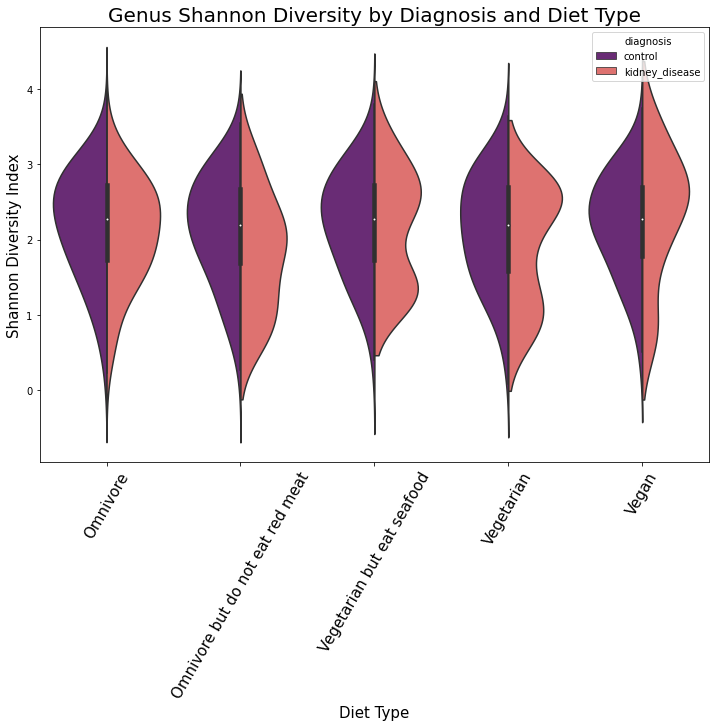

In [8]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Diet Type", fontsize = 20)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "diabetes")], 
               x="diet_type", y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True, 
              order = ["Omnivore", "Omnivore but do not eat red meat", "Vegetarian but eat seafood",
                      "Vegetarian", "Vegan"])
plt.xlabel("Diet Type", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 15, rotation = 60)
plt.show()

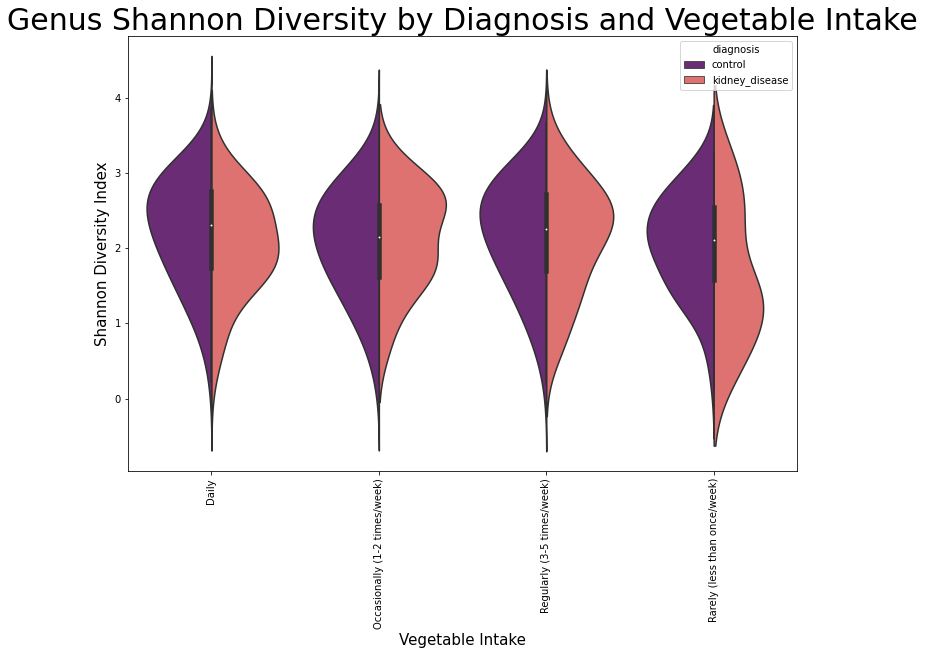

In [9]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Vegetable Intake", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "diabetes") & (~genus_df["vegetable_frequency"].isin(["Never", "Not provided"]))], 
               x='vegetable_frequency', y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Vegetable Intake", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

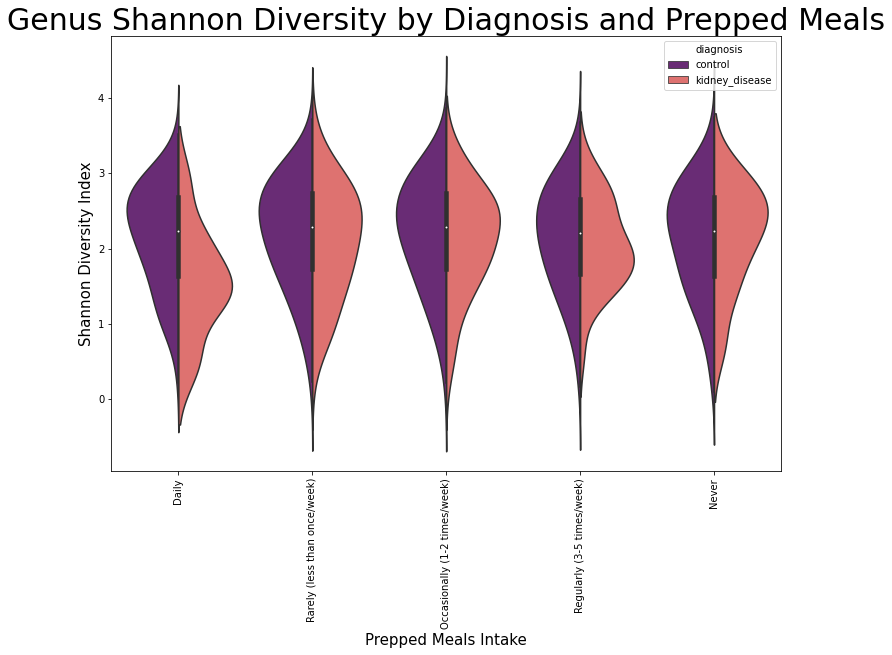

In [10]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Prepped Meals", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "diabetes") & (~genus_df["prepared_meals_frequency"].isin([ "Not provided"]))], 
               x='prepared_meals_frequency', y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Prepped Meals Intake", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

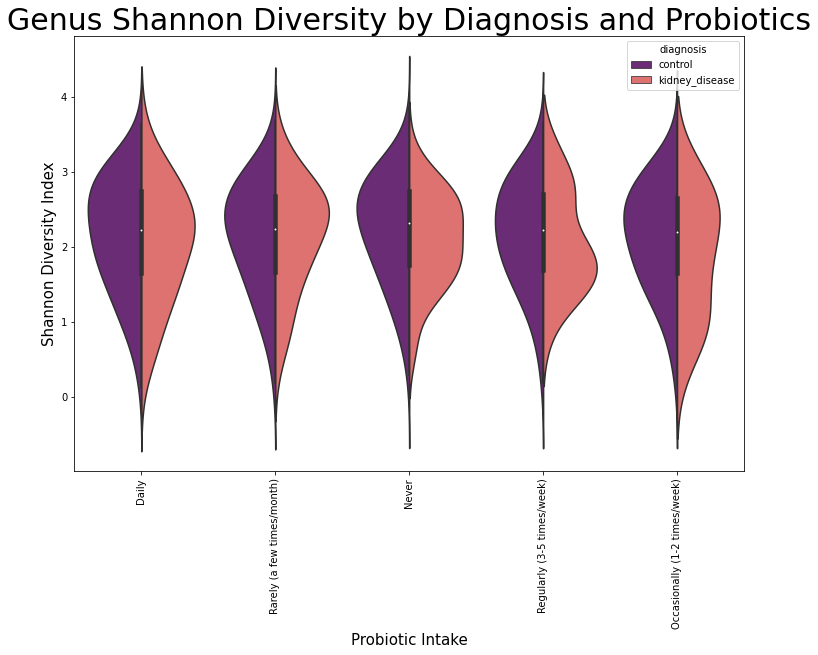

In [11]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Probiotics", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "diabetes") & (~genus_df["probiotic_frequency"].isin([ "Not provided"]))], 
               x='probiotic_frequency', y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Probiotic Intake", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

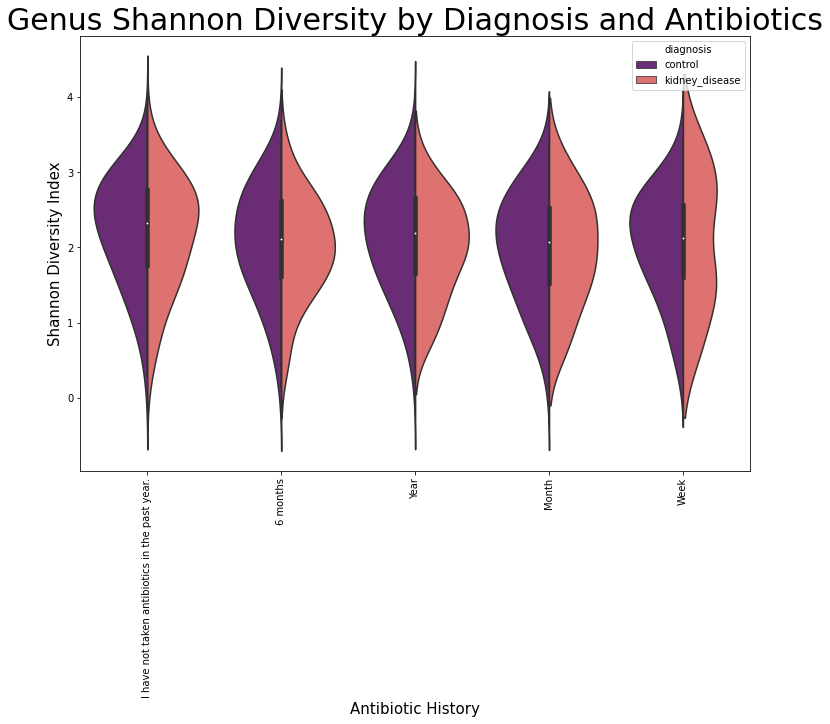

In [12]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Antibiotics", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "diabetes") & (~genus_df["antibiotic_history"].isin([ "Not provided"]))], 
               x='antibiotic_history', y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Antibiotic History", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

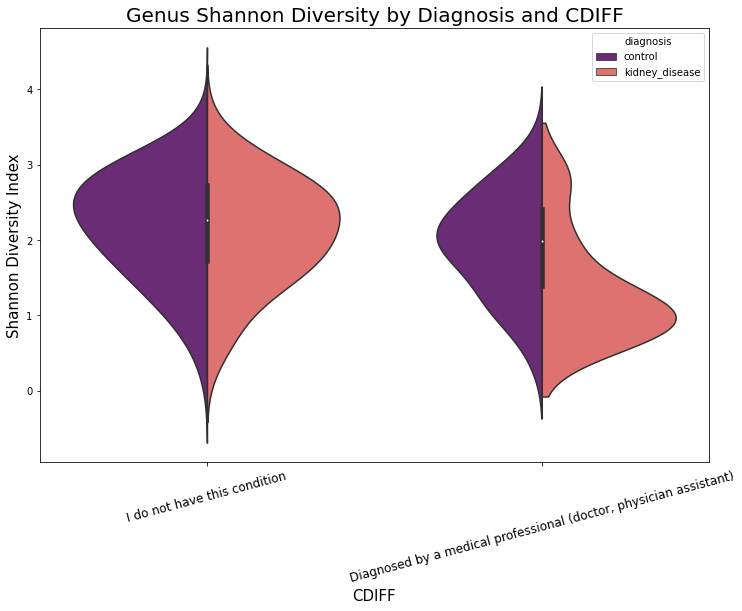

In [13]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and CDIFF", fontsize = 20)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "diabetes") & (genus_df["cdiff"].isin(['I do not have this condition', 'Diagnosed by a medical professional (doctor, physician assistant)']))], 
               x='cdiff', y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("CDIFF", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 12, rotation = 15)
plt.show()

## Diabetes Violin Plots
- These plots display visual differences in shannon diversity indexes across different demographic variables for the control group vs. the group with diagnosed diabetes

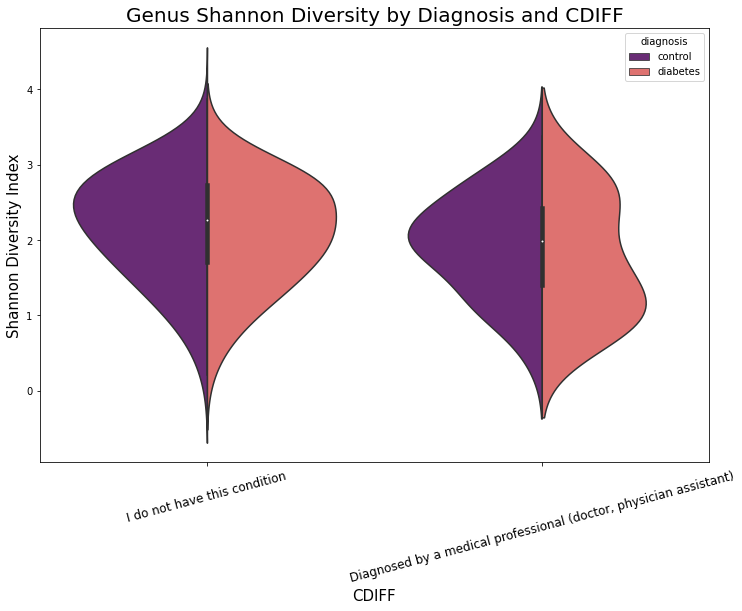

In [14]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and CDIFF", fontsize = 20)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "kidney_disease") & (genus_df["cdiff"].isin(['I do not have this condition', 'Diagnosed by a medical professional (doctor, physician assistant)']))], 
               x='cdiff', y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("CDIFF", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 12, rotation = 15)
plt.show()

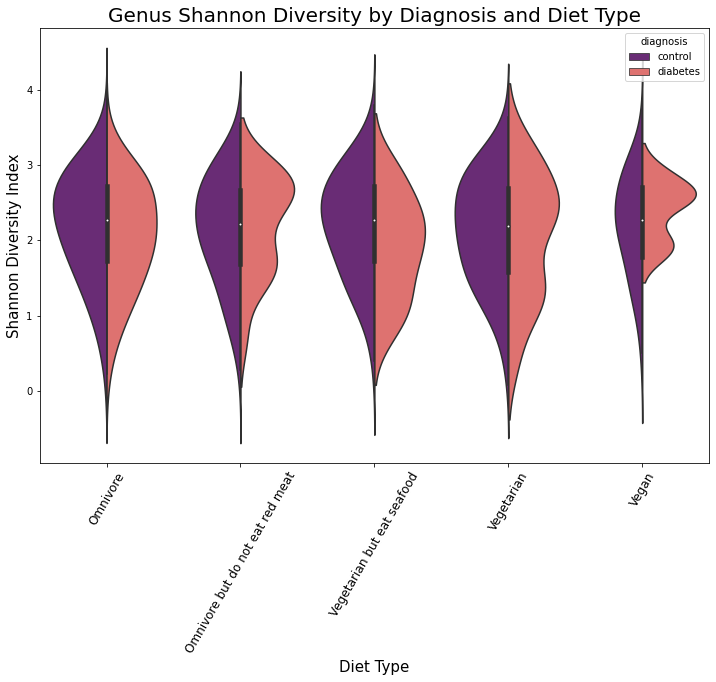

In [15]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Diet Type", fontsize = 20)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "kidney_disease")], 
               x="diet_type", y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True,order = ["Omnivore", "Omnivore but do not eat red meat", "Vegetarian but eat seafood",
                      "Vegetarian", "Vegan"] )
plt.xlabel("Diet Type", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 12, rotation = 60)
plt.show()

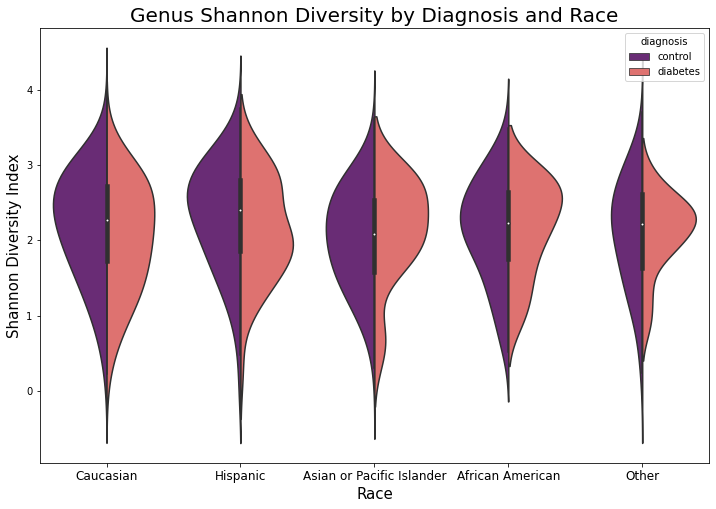

In [16]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Race", fontsize = 20)
sns.violinplot(data=genus_df[genus_df["diagnosis"] != "kidney_disease"], 
               x="race", y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma",
              order=["Caucasian", "Hispanic", "Asian or Pacific Islander", "African American", "Other"],
              split = True)
plt.xlabel("Race", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 12)
plt.show()

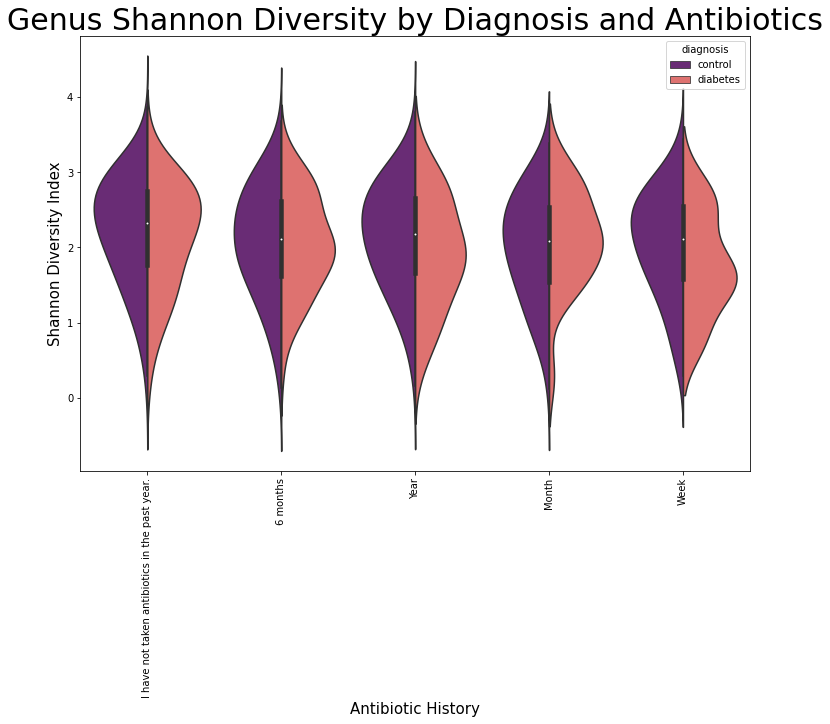

In [17]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Antibiotics", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "kidney_disease") & (~genus_df["antibiotic_history"].isin([ "Not provided"]))], 
               x='antibiotic_history', y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Antibiotic History", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

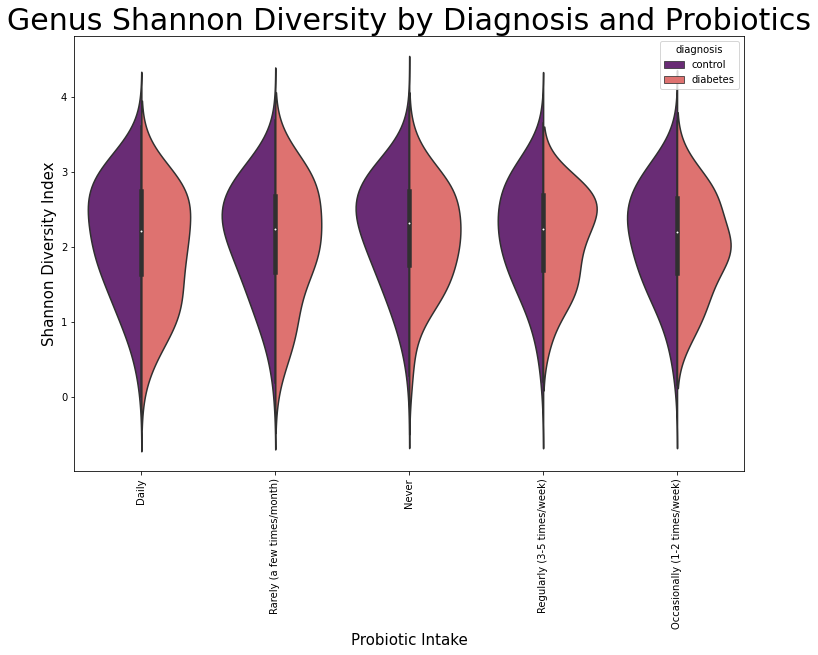

In [18]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Probiotics", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "kidney_disease") & (~genus_df["probiotic_frequency"].isin([ "Not provided"]))], 
               x='probiotic_frequency', y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Probiotic Intake", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

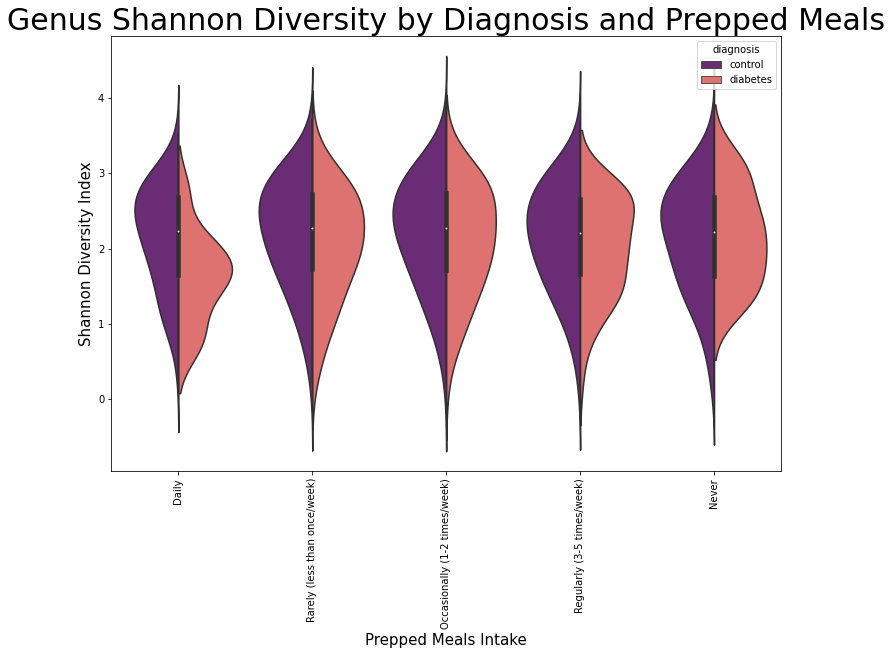

In [19]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Prepped Meals", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "kidney_disease") & (~genus_df["prepared_meals_frequency"].isin([ "Not provided"]))], 
               x='prepared_meals_frequency', y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Prepped Meals Intake", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

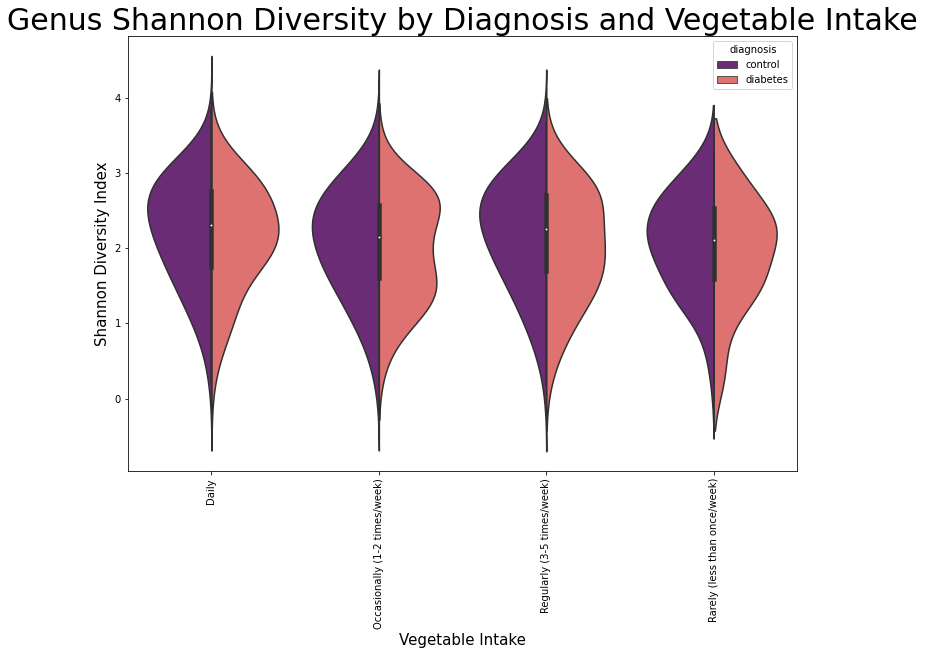

In [20]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Vegetable Intake", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "kidney_disease") & (~genus_df["vegetable_frequency"].isin(["Never", "Not provided"]))], 
               x='vegetable_frequency', y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Vegetable Intake", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

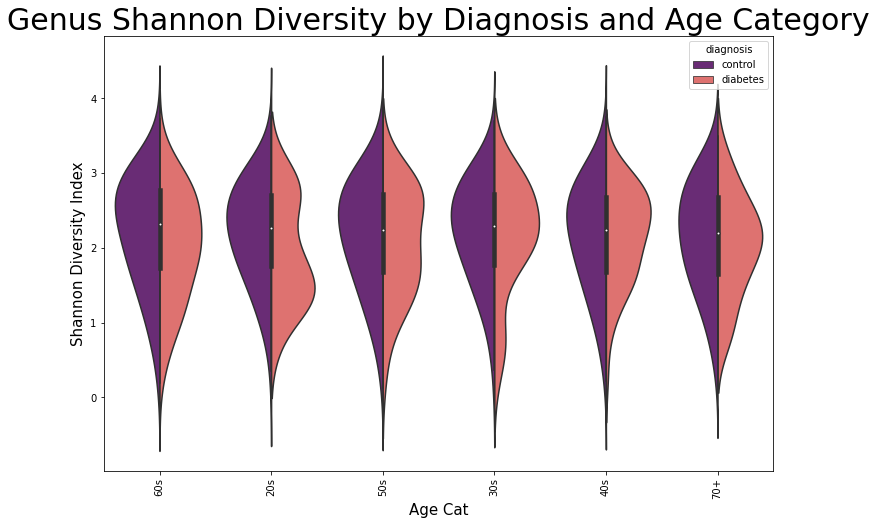

In [21]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Age Category", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "kidney_disease")], 
               x="age_cat", y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Age Cat", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

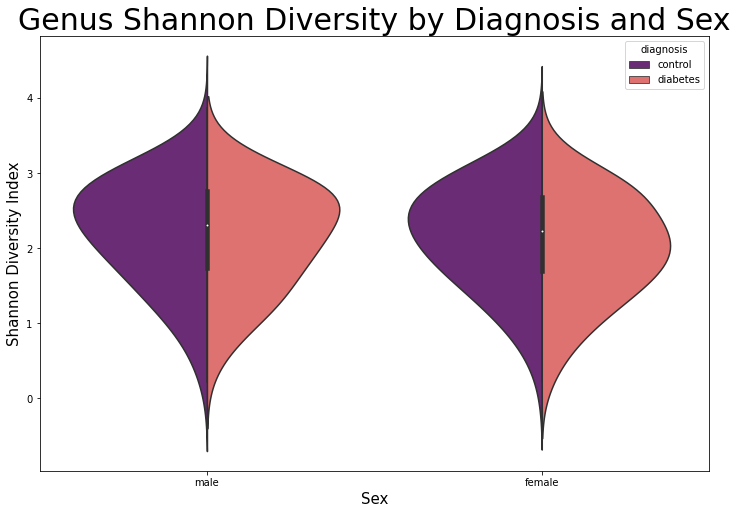

In [22]:
plt.figure(figsize=(12,8))
plt.title("Genus Shannon Diversity by Diagnosis and Sex", fontsize = 30)
sns.violinplot(data=genus_df[(genus_df["diagnosis"] != "kidney_disease") & (genus_df["sex"].isin(["male", "female"]))], 
               x="sex", y="shannon_index", hue="diagnosis",
              bw=.5, palette = "magma", split = True)
plt.xlabel("Sex", fontsize = 15)
plt.ylabel("Shannon Diversity Index", fontsize = 15)
plt.xticks(fontsize = 10)
plt.show()

## Genus Level Full Community
- Looking at the Genera makeup differences across all three populations with no filters

C:\Users\Capstone1\AppData\Local\Temp\2\ipykernel_6136\2092148193.py:1: DtypeWarning: Columns (0,816) have mixed types. Specify dtype option on import or set low_memory=False.
  genus_counts = pd.read_csv('count_files/genus_counts.csv')


Text(0.5, 1.0, 'Percentage Genus Counts by Diagnosis')

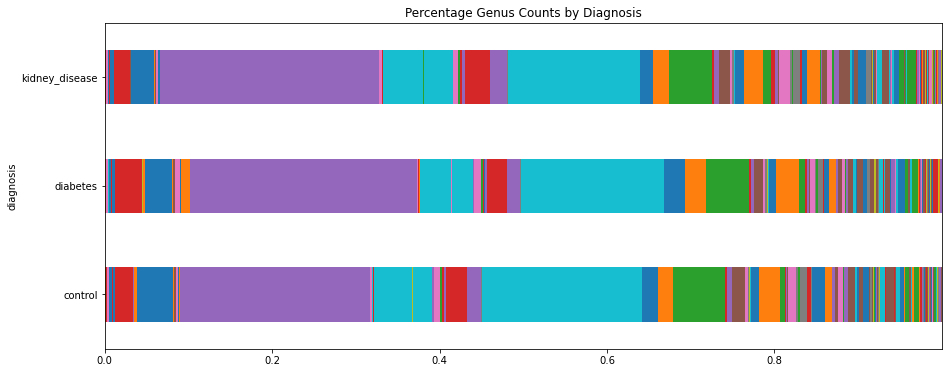

In [23]:
genus_counts = pd.read_csv('count_files/genus_counts.csv')
mean_genus = genus_counts.groupby('diagnosis').mean()
perc_genus = mean_genus.div(mean_genus.sum(axis=1), axis=0)

perc_genus.plot(kind='barh', stacked=True, legend=False, figsize=[15,6])
plt.title('Percentage Genus Counts by Diagnosis')

## T-tests Statistically Significant Genera
- Kidney Disease vs Control
- Diabetes vs Control

In [24]:
# load genus table
genus_counts = pd.read_csv('count_files/genus_counts.csv')

# separate by condition
diabetes = genus_counts[genus_counts.diagnosis == 'diabetes']
kidney = genus_counts[genus_counts.diagnosis == 'kidney_disease']
control = genus_counts[genus_counts.diagnosis == 'control']

C:\Users\Capstone1\AppData\Local\Temp\2\ipykernel_6136\2139302007.py:2: DtypeWarning: Columns (0,816) have mixed types. Specify dtype option on import or set low_memory=False.
  genus_counts = pd.read_csv('count_files/genus_counts.csv')


In [25]:
## Method to for T-tests for statistical significance at alpha = 0.05
def hypothesis_test(col1, col2):
    test = stats.ttest_ind(a=col1, b=col2)
    return test.pvalue

In [26]:
## Initiating empty lists to append significant columns too
diabetes_sig = []
kidney_sig = []

## Looping through all genera to decide on significance
for col in control.columns[1:810]: # Only grab genera columns
    p_kid = hypothesis_test(control[col], kidney[col])
    p_diab = hypothesis_test(control[col], diabetes[col])
    if(p_kid < .05):
        kidney_sig.append(col)
    if(p_diab < .05):
        diabetes_sig.append(col)

In [27]:
## remove features that are indicators of either/both conditions
intersection = list(set(kidney_sig) & set(diabetes_sig))
new_kid = [x for x in kidney_sig if x not in intersection]
new_diab = [x for x in diabetes_sig if x not in intersection]

In [28]:
## Genera that are significantly different vs control for both Kidney Disease and Diabetes
print(intersection)

['Sellimonas', 'Lactococcus', 'GCA-900066755', 'Ruminiclostridium_5', 'Faecalitalea', 'DNF00809', 'Brevibacterium', 'Weissella', 'Blautia', 'Adlercreutzia', 'Gordonibacter', 'Actinotignum', 'Catenibacterium', 'Ruminococcaceae_UCG-004', 'Negativibacillus', 'Howardella', 'Anaerofilum', 'Eggerthella', 'JGI_0001001-H03', 'Eubacterium', 'Streptococcus', 'Fusicatenibacter', 'Coprococcus_3']


In [29]:
## Genera that are significantly different vs control for both Kidney Disease
print(new_kid)

['Lachnospira', 'Ruminococcus_2', 'Coprococcus_2', 'Lachnospiraceae_NK4A136_group', 'Micromonospora', 'Paeniclostridium', 'BIyi10', 'Shuttleworthia', 'Lachnospiraceae_UCG-003', 'Lachnospiraceae_UCG-001', 'Gemmata', 'Anaeroplasma', 'Tyzzerella_4', 'Papillibacter', 'Cryptosporangium', 'Defluviitaleaceae_UCG-011']


In [30]:
## Genera that are significantly different vs control for both Kidney Disease
print(new_diab)

['Pseudomonas', 'Actinobacillus', 'Prevotella_7', 'Kytococcus', 'Fusobacterium', 'Bacteroides', 'Arthrobacter', 'Collinsella', 'Clostridium_sensu_stricto_1', 'Variovorax', 'Akkermansia', 'Parabacteroides', 'Oscillibacter', 'Bilophila', 'Alistipes', 'Streptobacillus', 'Lachnoclostridium', 'Candidimonas', 'Megasphaera', 'Coprococcus_1', 'F0332', 'Sporosarcina', 'Peptoclostridium', 'Candidatus_Nitrocosmicus', 'Serratia', 'Megamonas', 'Lachnospiraceae_UCG-010', 'Phascolarctobacterium', 'Cryptobacterium', 'Ruminiclostridium_9', 'Mucor', 'Flavonifractor', 'Angelakisella', 'DTU089', 'Family_XIII_AD3011_group', 'Desulfovibrio', 'Rikenellaceae_RC9_gut_group', 'Pseudoglutamicibacter', 'Intestinimonas', 'Pyramidobacter', 'Paenochrobactrum', 'Anaerofustis', 'Allisonella', 'Holdemania', 'Anaerotruncus', 'Candidatus_Soleaferrea', 'Advenella', 'Zoogloea', 'Acidaminococcus', 'Alcaligenes', 'Ruminococcaceae_UCG-001', 'Aquamicrobium', 'Pseudogracilibacillus', 'Rikenella', 'Cuneatibacter', 'Harryflintia'

Text(0.5, 1.0, 'Percentage Genus Counts by Diagnosis')

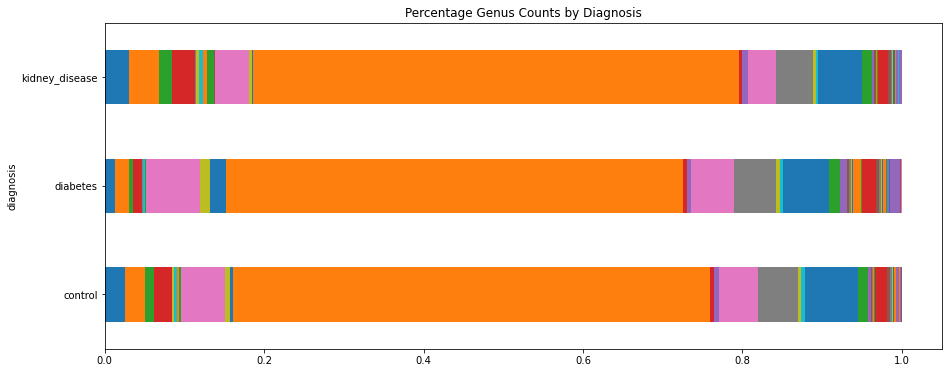

In [31]:
# barplot with only significant features included
new_feats = new_kid+new_diab + ['diagnosis']

mean_genus = genus_counts[new_feats].groupby('diagnosis').mean()
perc_genus = mean_genus.div(mean_genus.sum(axis=1), axis=0)

perc_genus.plot(kind='barh', stacked=True, legend=False, figsize=[15,6])
plt.title('Percentage Genus Counts by Diagnosis')

## Kidney Disease Heatmap

<AxesSubplot:>

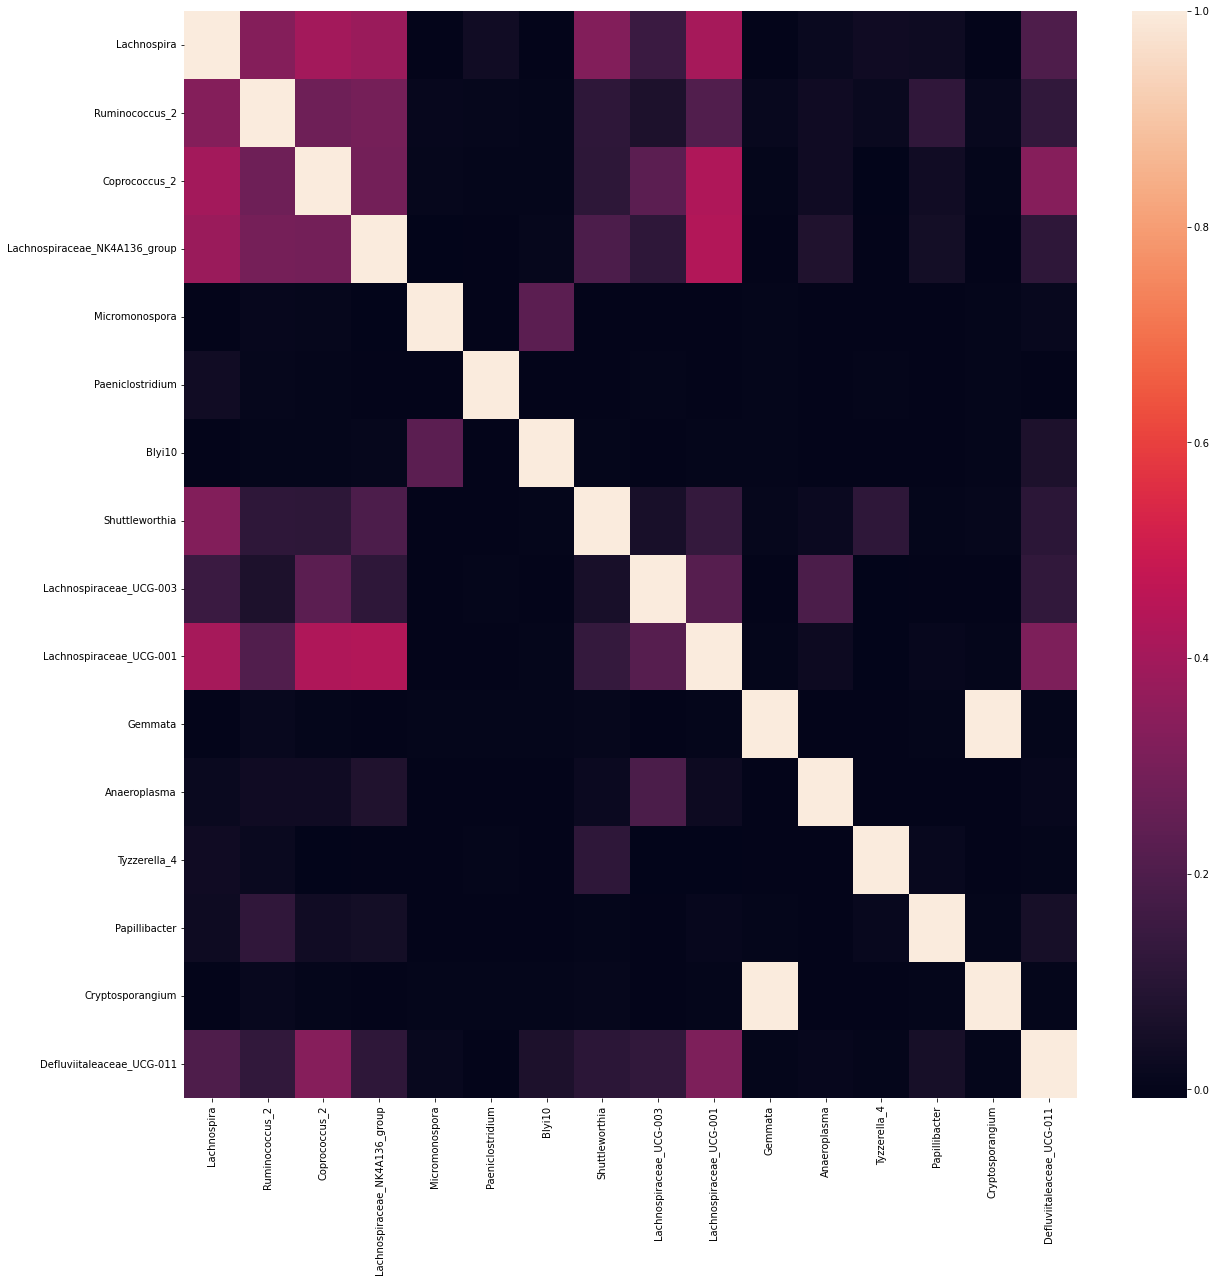

In [32]:
## calculate the correlation matrix
corr = genus_counts[new_kid].corr()
plt.figure(figsize=(20, 20))
## plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Diabetes Heat Map

<AxesSubplot:>

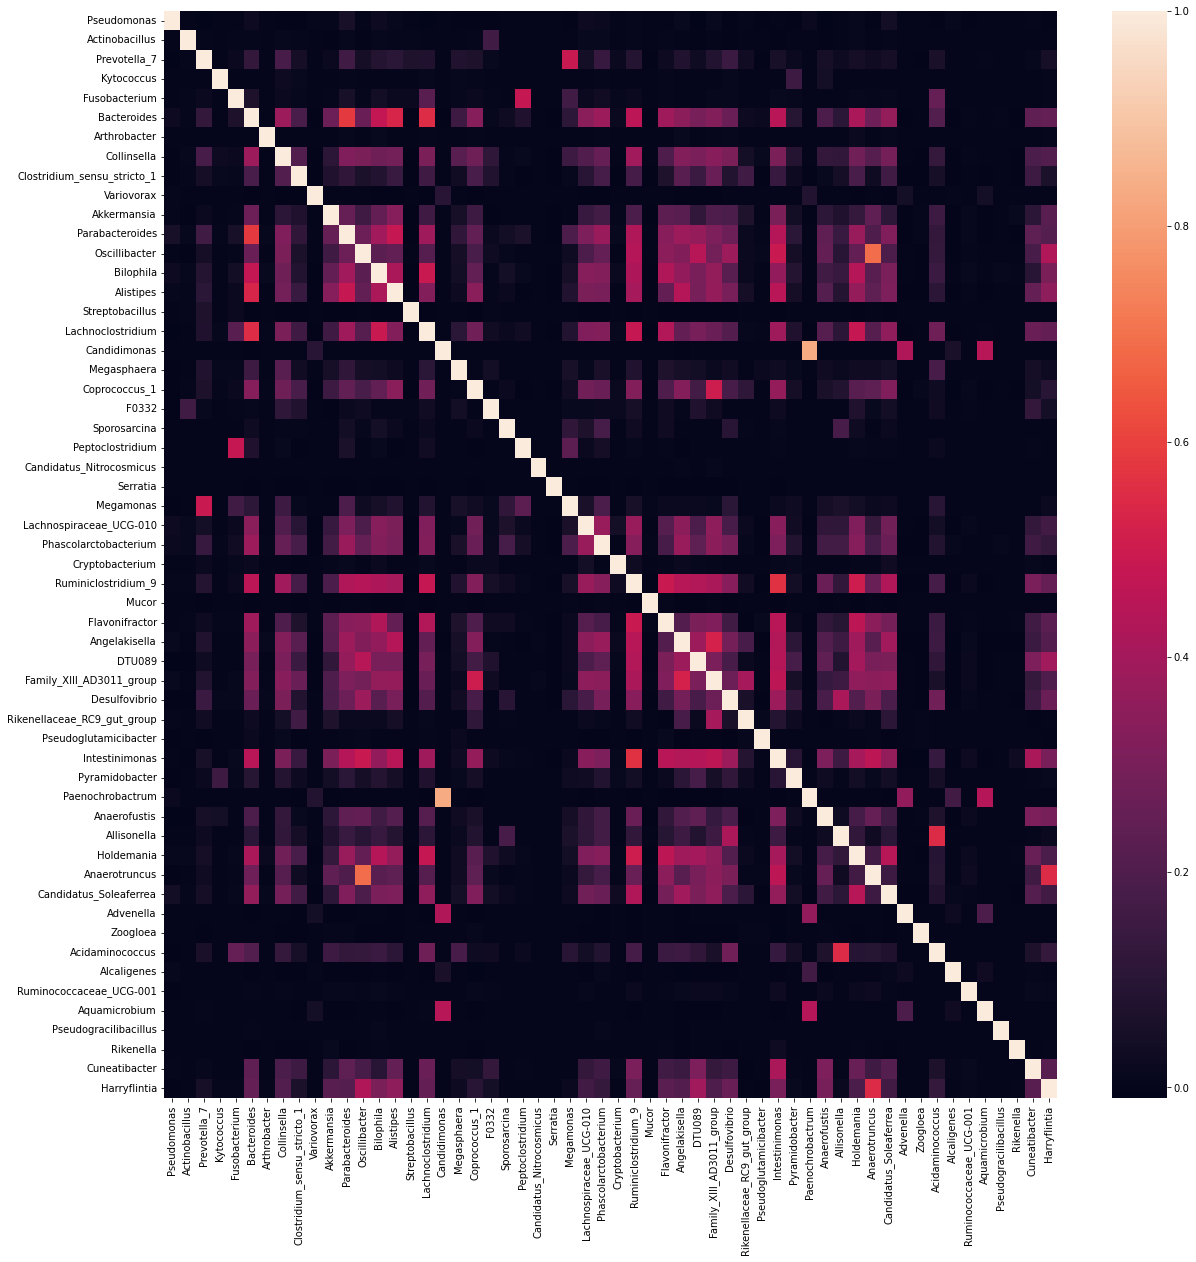

In [33]:
## calculate the correlation matrix
corr = genus_counts[new_diab].corr()
plt.figure(figsize=(20, 20))
## plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Text(0.5, 1.0, 'Relationship between Significant Genera vs. Control by Disease')

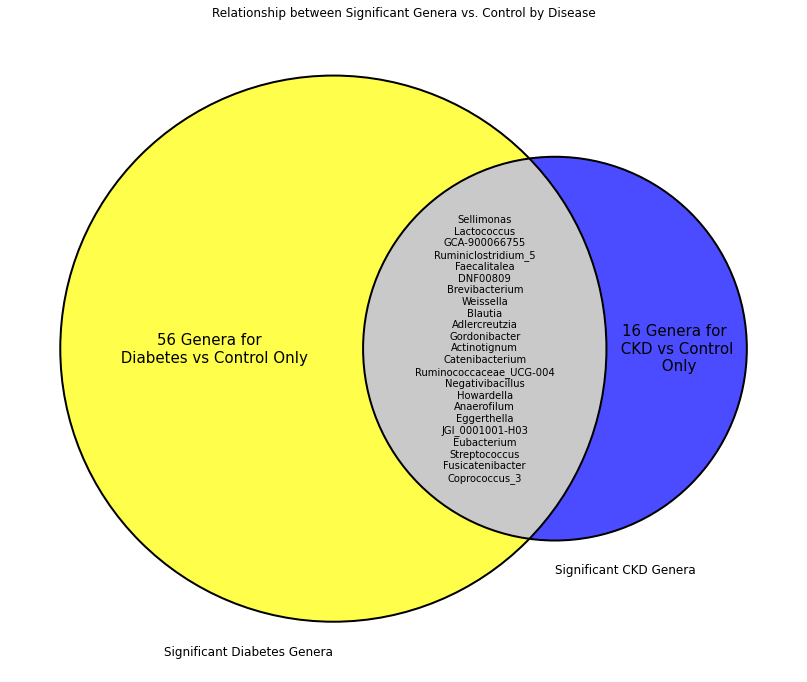

In [83]:
plt.figure(figsize=(15,12))
# adding labels using set_labels parameter
v = venn2([set(diabetes_sig), set(kidney_sig)], set_labels = ('Significant Diabetes Genera', 'Significant CKD Genera'), set_colors=('yellow', 'blue'), alpha = 0.7)
venn2_circles(subsets = (set(diabetes_sig), set(kidney_sig)))
v.get_label_by_id('11').set_text('\n'.join(intersection))
v.get_label_by_id('10').set_text('56 Genera for \n Diabetes vs Control Only')
v.get_label_by_id('10').set_fontsize(15)
v.get_label_by_id('01').set_text('16 Genera for \n CKD vs Control \n Only')
v.get_label_by_id('01').set_fontsize(15)
# plot title
plt.title('Relationship between Significant Genera vs. Control by Disease')

## Summary of EDA Notebook
- Looks at kidney disease vs control and diabetes vs control diversity across different demographics
- Looks at kidney disease vs diabetes vs control at general genus community level
- Investigates statistically significant genera which will are used for feature selection in the modeling notebook